### Automated Essay Grading Using Handcrafted Features 

We will be analyzing different features in the essays to attempt to increase cohen_kappa_score. The cohen_kappa_score function computes Cohen’s kappa, a score that expresses the level of agreement between two annotators on a classification problem

In [2]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('words')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [3]:
! pip install tqdm
from tqdm import tqdm

In [4]:
import nltk
import pandas as pd
from sklearn.svm import SVR,SVC
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy

In [36]:
from preprocess_data import *

In [37]:
train_dataset =  import_data_drop_na()

train_dataset

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17.0,18.0,NaN,35.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15.0,17.0,NaN,32.0,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20.0,26.0,40.0,40.0,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20.0,20.0,NaN,40.0,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


For the dataset below, we are most interested in the following variables: 

essay_id: identifies the essay

essay_set: Tells us what of the 8 different sets of prompts this essay was in

essay: The words/sentences we will be analyzing

domain1_score: Scoring of the essay

In [38]:
train_dataset.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
columns = ['essay_id', 'essay_set', 'essay', 'domain1_score']
df = pd.DataFrame(train_dataset, columns = columns)
df

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0
...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35.0
12974,21628,8,I never understood the meaning laughter is th...,32.0
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0
12976,21630,8,Trippin' on fen...,40.0


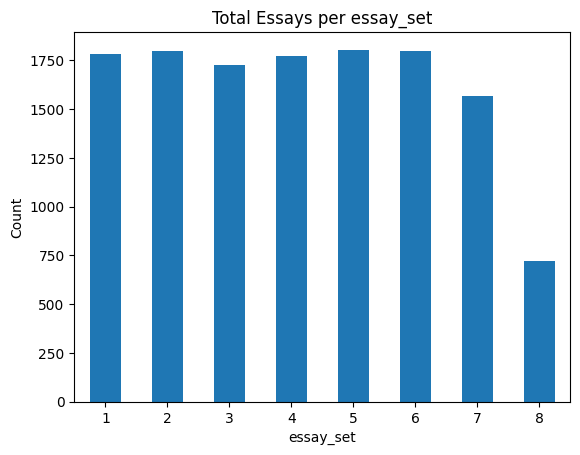

In [40]:
df.groupby('essay_set').agg('count').plot.bar(y='essay', rot=0, legend=False)
plt.title('Total Essays per essay_set')
plt.ylabel('Count')
plt.show()

Each prompt is scored on a different scale. 
We will look at the scaling of each set and normalize the data because of this specifically. 
We will use min-max scoring to normalize the data into a range between 0-1

In [41]:
df.groupby(['essay_set'])['domain1_score'].agg(['min','max','count','nunique'])

,min,max,count,nunique
essay_set,,,,
1,2.0,12.0,1783,11
2,1.0,6.0,1800,6
3,0.0,3.0,1726,4
4,0.0,3.0,1771,4
5,0.0,4.0,1805,5
6,0.0,4.0,1800,5
7,2.0,24.0,1569,23
8,10.0,60.0,723,34


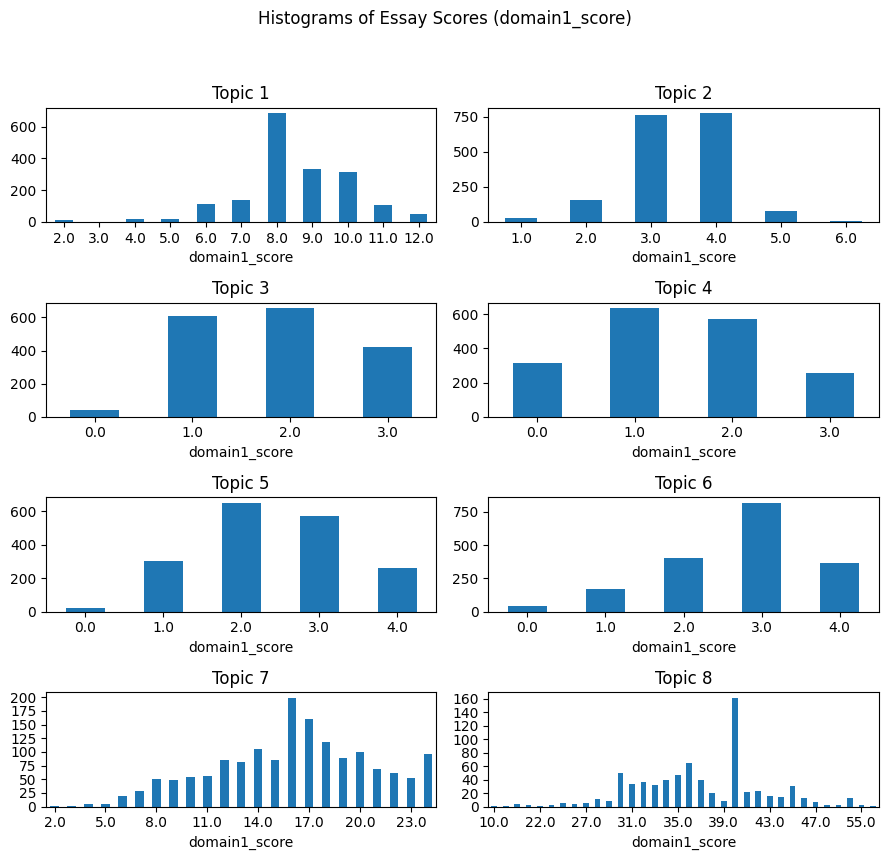

In [42]:
#look at the distribution of scoring within each topic before normalization

topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(9,9), sharey=False)
for i in range(4):
    for j in range(2):
        topic_number += 1
        df[df['essay_set'] == topic_number]\
            .groupby('domain1_score')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0)
        ax[i,j].set_title(f'Topic {topic_number}')
ax[3,0].locator_params(nbins=10)
ax[3,1].locator_params(nbins=10)
plt.suptitle('Histograms of Essay Scores (domain1_score)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Apply the Scoring Scaling to Data

The data is all scored on different scales. Preprocessing is done to scale all the features on the same scoring system. 
The system is from A-F based on the range of scores in each dataset. 

A 'scaled_grade' column is being added to the dataset

In [43]:
scaled_df = scale_essays(df)
scaled_df.head()

/home/luke/Drexel/SP-24/DSCI-691/project/handcrafted_features/preprocess_data.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_grade'] = df['domain1_score'].apply(map_score_to_grade)
/home/luke/Drexel/SP-24/DSCI-691/project/handcrafted_features/preprocess_data.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_grade'] = df['domain1_score'].apply(map_score_to_grade)
/home/luke/Drexel/SP-24/DSCI-691/project/handcrafted_features/preprocess_data.py:62: SettingWithCopyWarning: 
A valu

,essay_id,essay_set,essay,domain1_score,scaled_grade
0,1,1,"Dear local newspaper, I think effects computer...",8.0,C
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,B
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,D
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,B
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,C


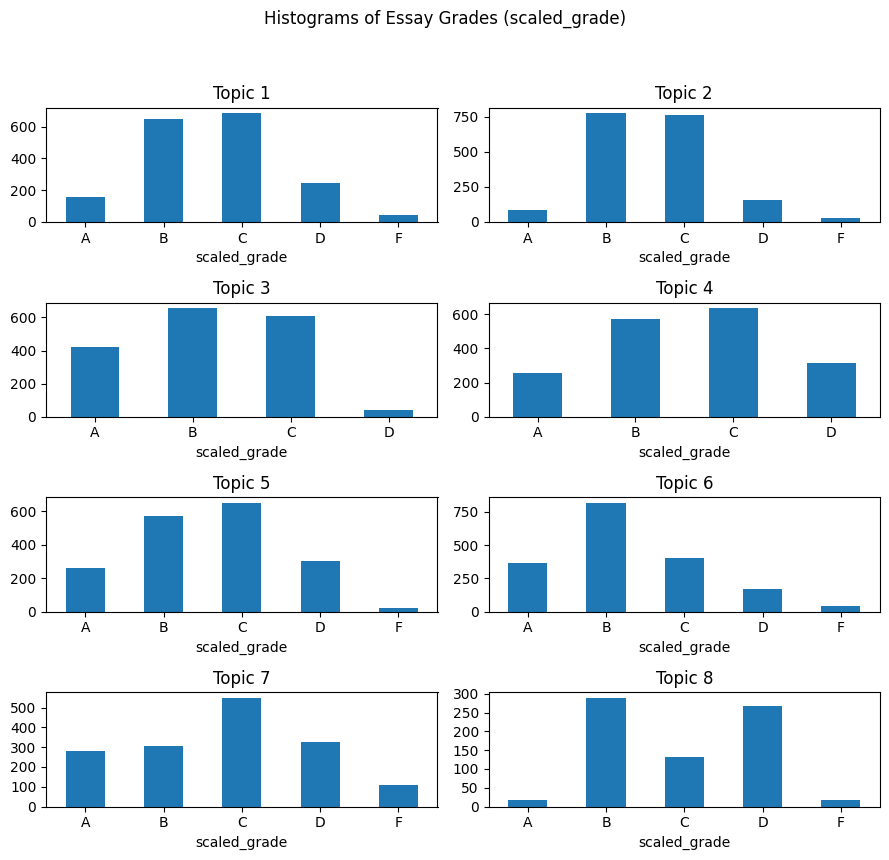

In [44]:
topic_number = 0
fig, ax = plt.subplots(4, 2, figsize=(9, 9), sharey=False)
for i in range(4):
    for j in range(2):
        topic_number += 1
        scaled_df[scaled_df['essay_set'] == topic_number]\
            .groupby('scaled_grade')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0)
        ax[i, j].set_title(f'Topic {topic_number}')
ax[3, 0].locator_params(nbins=10)
ax[3, 1].locator_params(nbins=10)
plt.suptitle('Histograms of Essay Grades (scaled_grade)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [45]:
def change_grades_to_numeric(df, grade_mapping): 
    scaled_df_num = scaled_df.copy()
    scaled_df_num['scaled_grade'] = scaled_df_num['scaled_grade'].map(grade_mapping)
    return scaled_df_num

grade_mapping = {'A':4, 'B':3, 'C':2, 'D':1, 'F':0}

In [46]:
scaled_df_num = change_grades_to_numeric(scaled_df, grade_mapping)

In [47]:
scaled_df_num.head()

,essay_id,essay_set,essay,domain1_score,scaled_grade
0,1,1,"Dear local newspaper, I think effects computer...",8.0,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,2


### Support Vector Classification (SVC)
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are that they are effective in high dimensional spaces and effective in cases where number of dimensions is greater than the number of samples.

In [48]:
# use vecorization method to make text in numerical output and allow ml model to digest

def vectorization(X_train, X_val, X_test):
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    if len(X_val) > 0:
        X_val = vectorizer.transform(X_val)
    X_test = vectorizer.transform(X_test)
    return X_train, X_val, X_test


In [49]:
X = scaled_df_num['essay']
y = scaled_df_num['scaled_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val = pd.DataFrame() 

X_train_vec, X_val_vec, X_test_vec = vectorization(X_train, X_val, X_test)

svr = SVC(kernel='linear') 
svr.fit(X_train_vec, y_train)

y_pred = svr.predict(X_test_vec)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6479198767334361


In [50]:
y_pred

array([2, 3, 3, ..., 2, 2, 3])

In [52]:
from sklearn.metrics import cohen_kappa_score

y_pred_rounded = y_pred.astype(int)

y_pred_int = y_pred_rounded.astype(int)
y_test_int = y_test.astype(int)

qwk = cohen_kappa_score(y_test_int, y_pred_int, weights='quadratic')
print("Quadratic Weighted Kappa (QWK):", qwk)

Quadratic Weighted Kappa (QWK): 0.5630476324665146


In [53]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_int,y_pred_int)

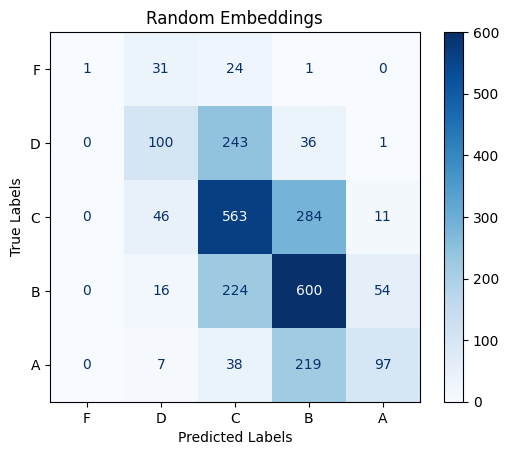

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["F", "D", "C", "B", "A"])

fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax) 

ax.set_title('Random Embeddings')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test_int, y_pred_int, target_names=["f","d","c",'b','a'])

print(report)

              precision    recall  f1-score   support

           f       1.00      0.02      0.03        57
           d       0.50      0.26      0.34       380
           c       0.52      0.62      0.56       904
           b       0.53      0.67      0.59       894
           a       0.60      0.27      0.37       361

    accuracy                           0.52      2596
   macro avg       0.63      0.37      0.38      2596
weighted avg       0.54      0.52      0.50      2596



### Applying Lexical Features

Lexical features are string-based, semantic, and syntactic features, and they can also be used for any text classification problem

Calculate ratios instead of absolute counts.

In [19]:
import nltk
import string
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import words

def num_chars_essay(text):
    return len(list(text))

def num_sents_essay(text):
    return len(sent_tokenize(text))

def avg_num_chars_word(text):
    return num_chars_essay(text) / num_words_essay(text)

def avg_num_chars_sent(text):
    return num_chars_essay(text) / num_sents_essay(text)

def num_puncts_essay(text):
    return len([char for char in list(text) if char in string.punctuation])

def avg_num_puncts_word(text):
    return num_puncts_essay(text) / num_words_essay(text)

def avg_num_puncts_sent(text):
    return num_puncts_essay(text) / num_sents_essay(text)

def num_words_essay(text):
    return len(word_tokenize(text))

def avg_num_words_sent(text):
    return num_words_essay(text) / num_sents_essay(text)

def num_unique_words_essay(text):
    return len(set(word_tokenize(text)))

def num_correct_words(text):
    correct_words = words.words()
    return len(list(set(correct_words) & set(word_tokenize(text)))) / num_words_essay(text)

def num_noun(text):
    pos_tagged = nltk.pos_tag(word_tokenize(text))
    return len([(word, pos) for (word, pos) in pos_tagged if 'NN' in pos])

def num_adj(text):
    pos_tagged = nltk.pos_tag(word_tokenize(text))
    return len([(word, pos) for (word, pos) in pos_tagged if 'JJ' in pos])


In [20]:
def avg_num_chars_word(text):
    return num_chars_essay(text) / max(1, num_words_essay(text))

def avg_num_chars_sent(text):
    return num_chars_essay(text) / max(1, num_sents_essay(text))

def avg_num_puncts_word(text):
    return num_puncts_essay(text) / max(1, num_words_essay(text))

def avg_num_puncts_sent(text):
    return num_puncts_essay(text) / max(1, num_sents_essay(text))

def avg_num_words_sent(text):
    return num_words_essay(text) / max(1, num_sents_essay(text))

def avg_num_unique_words_essay(text):
    return num_unique_words_essay(text) / max(1, num_words_essay(text))

In [21]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurenmiller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laurenmiller/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
#chose the ones I wanted to use, could use more. Takes a while to run
def lexical_features(df):
    
    #scaled_df_num = pd.DataFrame(data)

    #scaled_df_num['num_chars_essay'] = scaled_df_num['essay'].apply(num_chars_essay)
    #scaled_df_num['avg_num_chars_word'] = scaled_df_num['essay'].apply(avg_num_chars_word)
    #scaled_df_num['avg_num_chars_sent'] = scaled_df_num['essay'].apply(avg_num_chars_sent)

    #scaled_df_num['num_puncts_essay'] = scaled_df_num['essay'].apply(num_puncts_essay)
    #scaled_df_num['avg_num_puncts_word'] = scaled_df_num['essay'].apply(avg_num_puncts_word)
    #scaled_df_num['avg_num_puncts_sent'] = scaled_df_num['essay'].apply(avg_num_puncts_sent)

    #scaled_df_num['num_words_essay'] = scaled_df_num['essay'].apply(num_words_essay)
    #scaled_df_num['avg_num_words_sent'] = scaled_df_num['essay'].apply(avg_num_words_sent)
    #scaled_df_num['num_unique_words_essay'] = scaled_df_num['essay'].apply(num_unique_words_essay)

    #scaled_df_num['num_sents_essay'] = scaled_df_num['essay'].apply(num_sents_essay)

    scaled_df_num['num_correct_words'] = scaled_df_num['essay'].apply(num_correct_words)
    scaled_df_num['num_noun'] = scaled_df_num['essay'].apply(num_noun)
    scaled_df_num['num_adj'] = scaled_df_num['essay'].apply(num_adj)

    scaled_df_num['avg_num_chars_word'] = scaled_df_num['essay'].apply(avg_num_chars_word)
    scaled_df_num['avg_num_chars_sent'] = scaled_df_num['essay'].apply(avg_num_chars_sent)
    scaled_df_num['avg_num_puncts_word'] = scaled_df_num['essay'].apply(avg_num_puncts_word)
    scaled_df_num['avg_num_puncts_sent'] = scaled_df_num['essay'].apply(avg_num_puncts_sent)
    scaled_df_num['avg_num_words_sent'] = scaled_df_num['essay'].apply(avg_num_words_sent)
    scaled_df_num['avg_num_unique_words_essay'] = scaled_df_num['essay'].apply(avg_num_unique_words_essay)

    return scaled_df_num

In [32]:
#this takes a long time to run
lex_df = lexical_features(scaled_df_num)
columns = ['essay','avg_num_chars_word', 'avg_num_chars_sent', 'avg_num_puncts_word', 'avg_num_puncts_sent', 'avg_num_words_sent', 'avg_num_unique_words_essay', 'num_correct_words', 'num_noun', 'num_adj']
lex_df

,essay_id,essay_set,essay,domain1_score,scaled_grade,num_correct_words,num_noun,num_adj,avg_num_chars_word,avg_num_chars_sent,avg_num_puncts_word,avg_num_puncts_sent,avg_num_words_sent,avg_num_unique_words_essay
0,1,1,"Dear local newspaper, I think effects computer...",8.0,2,0.316062,84,22,4.857513,117.187500,0.142487,3.437500,24.125000,0.468912
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3,0.308190,114,21,4.931034,114.400000,0.099138,2.300000,23.200000,0.450431
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1,0.373802,86,19,4.923323,110.071429,0.108626,2.428571,22.357143,0.514377
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3,0.263502,197,52,5.180033,117.222222,0.148936,3.370370,22.629630,0.436989
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,2,0.286267,116,32,4.969052,85.633333,0.106383,1.833333,17.233333,0.408124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12972,21626,8,In most stories mothers and daughters are eit...,35.0,1,0.257200,210,55,4.428004,165.148148,0.160874,6.000000,37.296296,0.344588
12973,21628,8,I never understood the meaning laughter is th...,32.0,1,0.256757,153,47,4.228228,80.457143,0.180180,3.428571,19.028571,0.342342
12974,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3,0.276830,228,55,4.610832,112.121951,0.194584,4.731707,24.317073,0.378134
12975,21630,8,Trippin' on fen...,40.0,3,0.279240,121,44,4.510234,79.102564,0.182749,3.205128,17.538462,0.377193


In [48]:
lex_df.to_csv('lexical_avg_features.csv', index=False)

In [3]:
#load in csv to use model
import pandas as pd
lex_df = pd.read_csv('lexical_avg_features.csv')
lex_df

,essay_id,essay_set,essay,domain1_score,scaled_grade,num_correct_words,num_noun,num_adj,avg_num_chars_word,avg_num_chars_sent,avg_num_puncts_word,avg_num_puncts_sent,avg_num_words_sent,avg_num_unique_words_essay
0,1,1,"Dear local newspaper, I think effects computer...",8.0,2,0.316062,84,22,4.857513,117.187500,0.142487,3.437500,24.125000,0.468912
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,3,0.308190,114,21,4.931034,114.400000,0.099138,2.300000,23.200000,0.450431
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1,0.373802,86,19,4.923323,110.071429,0.108626,2.428571,22.357143,0.514377
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3,0.263502,197,52,5.180033,117.222222,0.148936,3.370370,22.629630,0.436989
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,2,0.286267,116,32,4.969052,85.633333,0.106383,1.833333,17.233333,0.408124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12972,21626,8,In most stories mothers and daughters are eit...,35.0,1,0.257200,210,55,4.428004,165.148148,0.160874,6.000000,37.296296,0.344588
12973,21628,8,I never understood the meaning laughter is th...,32.0,1,0.256757,153,47,4.228228,80.457143,0.180180,3.428571,19.028571,0.342342
12974,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3,0.276830,228,55,4.610832,112.121951,0.194584,4.731707,24.317073,0.378134
12975,21630,8,Trippin' on fen...,40.0,3,0.279240,121,44,4.510234,79.102564,0.182749,3.205128,17.538462,0.377193


In [5]:
X = lex_df[['num_correct_words', 'num_noun', 'num_adj', 
                   'avg_num_chars_word', 'avg_num_chars_sent', 
                   'avg_num_puncts_word', 'avg_num_puncts_sent', 
                   'avg_num_words_sent', 'avg_num_unique_words_essay']]
y = lex_df['scaled_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc = SVC(kernel='linear')  
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9433744221879815


In [6]:
y_pred_rounded = y_pred.round().astype(int)

y_pred_int = y_pred_rounded.astype(int)
y_test_int = y_test.astype(int)

qwk = cohen_kappa_score(y_test_int, y_pred_int, weights='quadratic')
print("Lexical Features: Quadratic Weighted Kappa (QWK):", qwk)

Lexical Features: Quadratic Weighted Kappa (QWK): 0.2199879077099146


In [7]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_int,y_pred_int)

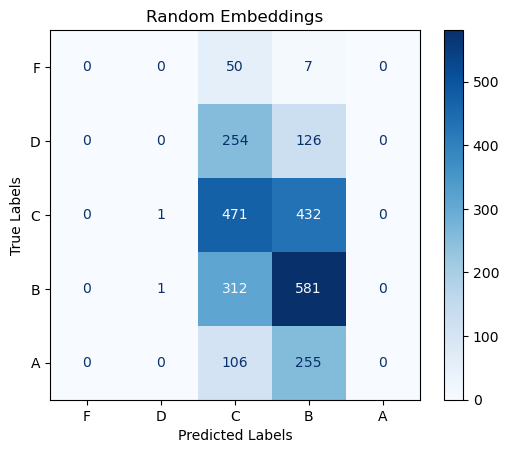

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["F", "D", "C", "B", "A"])

fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax) 

ax.set_title('Random Embeddings')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test_int, y_pred_int, target_names=["f","d","c",'b','a'])

print(report)

              precision    recall  f1-score   support

           f       0.00      0.00      0.00        57
           d       0.00      0.00      0.00       380
           c       0.39      0.52      0.45       904
           b       0.41      0.65      0.51       894
           a       0.00      0.00      0.00       361

    accuracy                           0.41      2596
   macro avg       0.16      0.23      0.19      2596
weighted avg       0.28      0.41      0.33      2596



/Users/laurenmiller/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurenmiller/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/laurenmiller/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


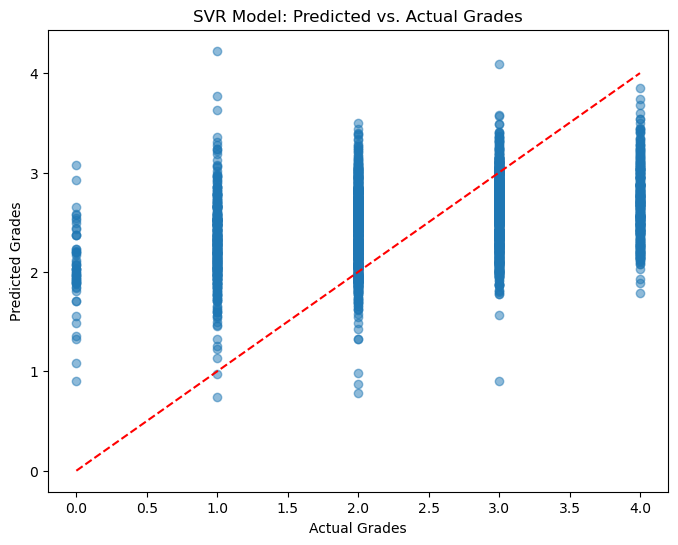

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('SVR Model: Predicted vs. Actual Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plotting the diagonal line
plt.show()


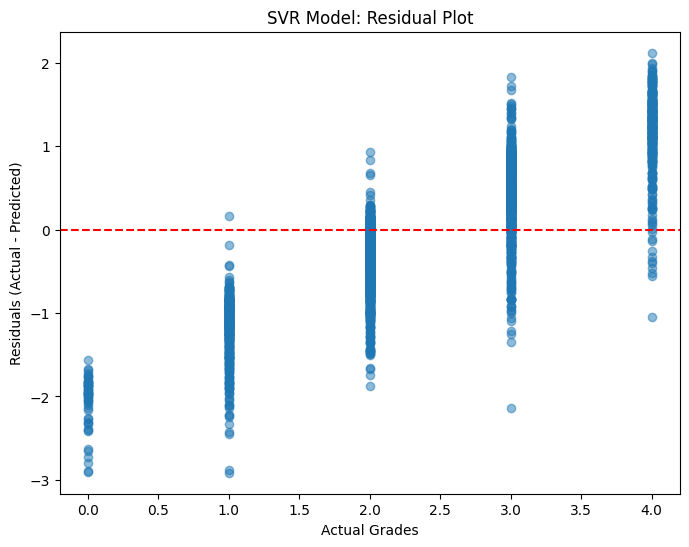

In [27]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('SVR Model: Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf'],  
    'C': [0.1, 1],                  
    'gamma': ['scale'],
    'degree': [2]                   
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)



Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score (MSE): 0.7351070899232308
